# Merchants cleaning

In [1]:
import os
import pandas as pd
import numpy as np
from collections import Counter

# Plot libraries
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

# Random seed for reproducibility
seed = 202
np.random.seed(seed)

# Ignore warnings
import warnings
warnings.simplefilter('ignore')

# Garbage collector
import gc
gc.enable()

In [2]:
merchants_df = pd.read_csv("merchants.csv")
merchants_df.shape

(334696, 22)

In [3]:
merchants_df.head()

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,...,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
0,M_ID_838061e48c,8353,792,9,-0.057471,-0.057471,N,E,E,-0.40,...,-2.25,18.666667,6,-2.32,13.916667,12,N,242,9,1.0
1,M_ID_9339d880ad,3184,840,20,-0.057471,-0.057471,N,E,E,-0.72,...,-0.74,1.291667,6,-0.57,1.687500,12,N,22,16,1.0
2,M_ID_e726bbae1e,447,690,1,-0.057471,-0.057471,N,E,E,-82.13,...,-82.13,260.000000,2,-82.13,260.000000,2,N,-1,5,5.0
3,M_ID_a70e9c5f81,5026,792,9,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,4.666667,6,NaN,3.833333,12,Y,-1,-1,NaN
4,M_ID_64456c37ce,2228,222,21,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,0.361111,6,NaN,0.347222,12,Y,-1,-1,NaN


In [4]:
merchants_df.isnull().sum()

merchant_id                        0
merchant_group_id                  0
merchant_category_id               0
subsector_id                       0
numerical_1                        0
numerical_2                        0
category_1                         0
most_recent_sales_range            0
most_recent_purchases_range        0
avg_sales_lag3                    13
avg_purchases_lag3                 0
active_months_lag3                 0
avg_sales_lag6                    13
avg_purchases_lag6                 0
active_months_lag6                 0
avg_sales_lag12                   13
avg_purchases_lag12                0
active_months_lag12                0
category_4                         0
city_id                            0
state_id                           0
category_2                     11887
dtype: int64

In [47]:
def cat_plot(df, col):
    cnt_srs = df[col].value_counts()
    cnt_srs = cnt_srs.sort_index()
    plt.figure(figsize=(14,6))
    sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color='green')
    plt.xticks(rotation='vertical')
    plt.xlabel('First active month', fontsize=12)
    plt.ylabel('Number of cards', fontsize=12)
    plt.title("First active month count in train set")
    plt.show()

In [39]:
print("Number of unique merchant_category_id in transactions set :",merchants_df.merchant_category_id.nunique(), " out of rows : ",merchants_df.shape[0])

Number of unique merchant_category_id in transactions set : 324  out of rows :  334696


#### category_1

In [25]:
print("Number of unique category_1 in transactions set :",merchants_df.category_1.nunique(), " out of rows : ",merchants_df.shape[0])

Number of unique category_1 in transactions set : 2  out of rows :  334696


In [26]:
print(Counter(merchants_df['category_1']))

Counter({'N': 327657, 'Y': 7039})


In [27]:
# Change to boolean
merchants_df = merchants_df.replace({'category_1': {'Y': True, 'N': False}})

In [28]:
print(Counter(merchants_df['category_1']))

Counter({False: 327657, True: 7039})


#### category_4

In [54]:
print("Number of unique category_4 in transactions set :",merchants_df.category_4.nunique(), " out of rows : ",merchants_df.shape[0])

Number of unique category_4 in transactions set : 2  out of rows :  334696


In [56]:
print(Counter(merchants_df['category_4']))

Counter({False: 238596, True: 96100})


In [55]:
# Change to boolean
merchants_df = merchants_df.replace({'category_4': {'Y': True, 'N': False}})

In [57]:
print(Counter(merchants_df['category_4']))

Counter({False: 238596, True: 96100})


#### category_2

In [29]:
print("Number of unique category_2 in transactions set :",merchants_df.category_2.nunique(), " out of rows : ",merchants_df.shape[0])

Number of unique category_2 in transactions set : 5  out of rows :  334696


In [51]:
merchants_df['category_2'].fillna(6.0, inplace=True)

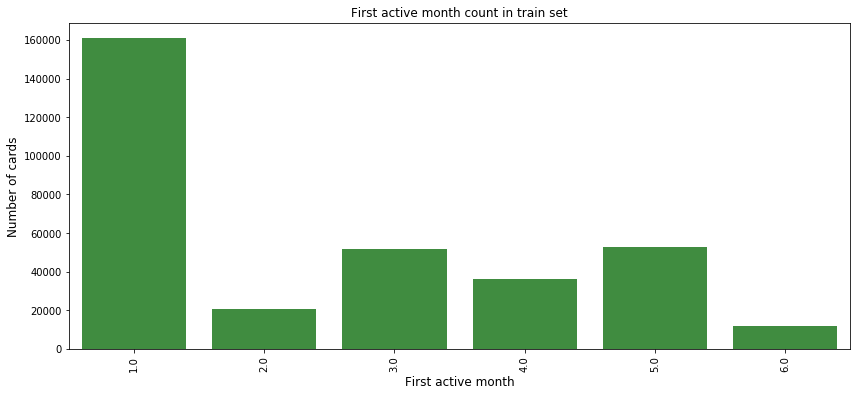

In [52]:
cat_plot(merchants_df, 'category_2')

#### city_id

In [45]:
print("Number of unique state_id in transactions set :",merchants_df.state_id.nunique(), " out of rows : ",merchants_df.shape[0])

Number of unique state_id in transactions set : 25  out of rows :  334696


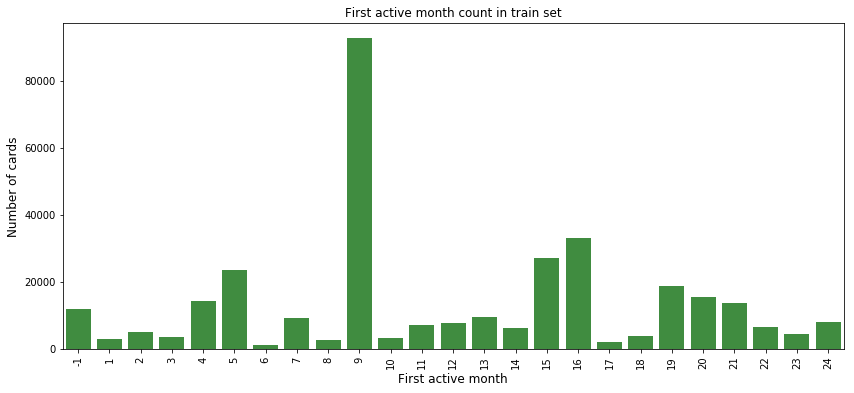

In [49]:
cat_plot(merchants_df, 'state_id')

### Drop nan rows (13)

In [58]:
merchants_df.dropna(subset=['avg_sales_lag3'], inplace=True)

In [59]:
merchants_df.isnull().sum()

merchant_id                    0
merchant_group_id              0
merchant_category_id           0
subsector_id                   0
numerical_1                    0
numerical_2                    0
category_1                     0
most_recent_sales_range        0
most_recent_purchases_range    0
avg_sales_lag3                 0
avg_purchases_lag3             0
active_months_lag3             0
avg_sales_lag6                 0
avg_purchases_lag6             0
active_months_lag6             0
avg_sales_lag12                0
avg_purchases_lag12            0
active_months_lag12            0
category_4                     0
city_id                        0
state_id                       0
category_2                     0
dtype: int64

In [53]:
merchants_df.head()

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,...,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
0,M_ID_838061e48c,8353,792,9,-0.057471,-0.057471,False,E,E,-0.40,...,-2.25,18.666667,6,-2.32,13.916667,12,N,242,9,1.0
1,M_ID_9339d880ad,3184,840,20,-0.057471,-0.057471,False,E,E,-0.72,...,-0.74,1.291667,6,-0.57,1.687500,12,N,22,16,1.0
2,M_ID_e726bbae1e,447,690,1,-0.057471,-0.057471,False,E,E,-82.13,...,-82.13,260.000000,2,-82.13,260.000000,2,N,-1,5,5.0
3,M_ID_a70e9c5f81,5026,792,9,-0.057471,-0.057471,True,E,E,NaN,...,NaN,4.666667,6,NaN,3.833333,12,Y,-1,-1,6.0
4,M_ID_64456c37ce,2228,222,21,-0.057471,-0.057471,True,E,E,NaN,...,NaN,0.361111,6,NaN,0.347222,12,Y,-1,-1,6.0


### Export cleaned dataframe

In [60]:
merchants_df.to_csv('(1)merchant.csv', index = False)